In [4]:
import math
import random
import matplotlib.pyplot as plt

In [5]:
# Gillespie algorithm

def gillespie(
    alpha = 1,
    beta = 1.5,
    T = 10.0,
    t_initial = 0.0,
    x_initial = 3
    ):

    # Initialize results list
    time = [t_initial]
    num_x = [x_initial]

    # Initialise variables
    t = t_initial
    x = x_initial

    # Main loop
    while t < T:
        if x == 0:
            break

        # Generate two random uniform distributed numbers in (0, 1)
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        
        # Calculate propensity functions
        w1 = alpha * x
        w2 = beta * x

        # Sum propensity functions
        w_sum = w1 + w2

        if w_sum == 0:
            break

        # Compute next reaction time
        dt = -math.log(r1) / w_sum
        t = t + dt

        if (0 <= r2 and r2 < w1 / w_sum):
            x = x + 1
        else:
            x = x - 1
        
        time.append(t)
        num_x.append(x)

    return time, num_x

In [6]:
def plot_gillespie(
    alpha = 1,
    beta = 1,
    T = 25.0,
    t_initial = 0.0,
    x_initial = 3,
    repeats = 1,
    title = ''
    ):

    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    for i in range(repeats):
        label = 'Path ' + str(i + 1)
        time, number = gillespie(alpha, beta, T, t_initial, x_initial)
        plt.plot(time, number, label = label)

    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Number of Species')
    plt.title(title)
    fig.show()

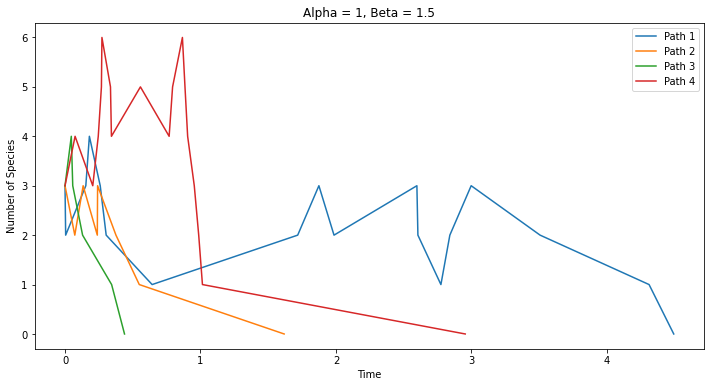

In [7]:
plot_gillespie(alpha = 1, beta = 1.5, repeats = 4, title = 'Alpha = 1, Beta = 1.5')

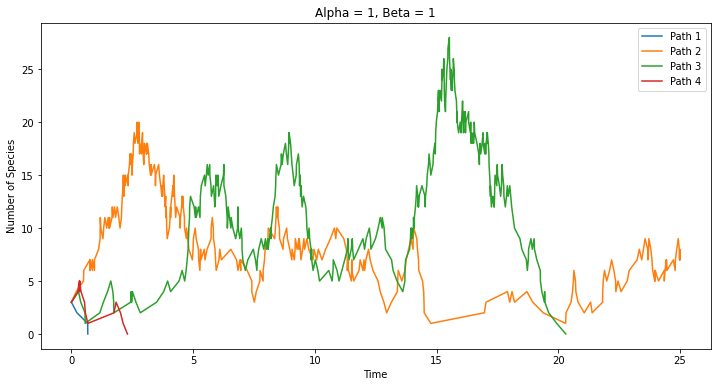

In [8]:
plot_gillespie(alpha = 1, beta = 1, repeats = 4, title = 'Alpha = 1, Beta = 1')

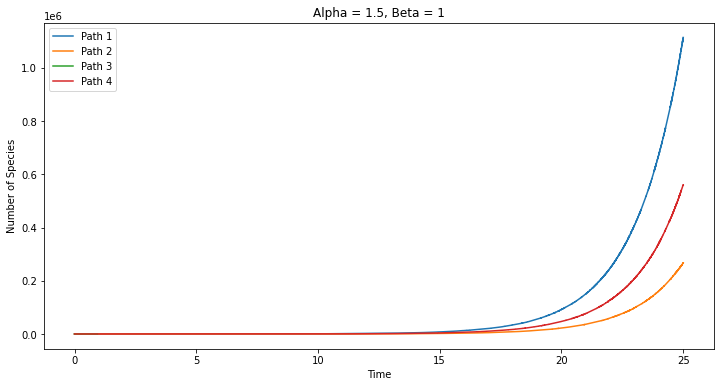

In [9]:
plot_gillespie(alpha = 1.5, beta = 1, repeats = 4, title = 'Alpha = 1.5, Beta = 1')